# MNIST

date: 2023/08/14

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

## Loading MNIST data set

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

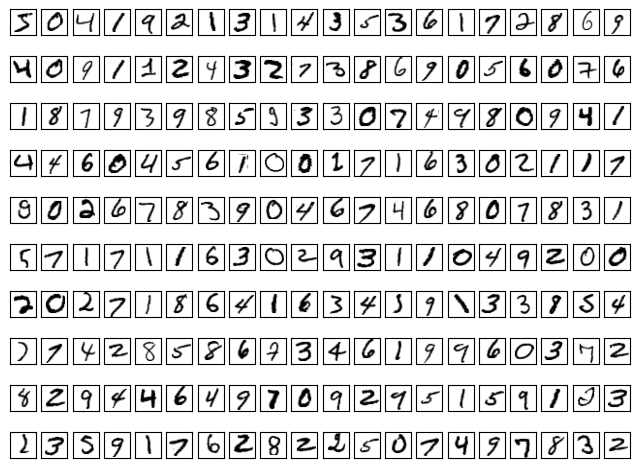

In [9]:
fig, axes = plt.subplots(10, 20, figsize=(8,6))

for y in range(10):
    for x in range(20):
        ax = axes[y, x]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set(xlabel=None)
        ax.imshow(train_images[y * 20 + x], cmap=plt.cm.binary)

## Very simple neural network

In [10]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/222

In [13]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2651 - accuracy: 0.9231
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1086 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0707 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0513 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0389 - accuracy: 0.9887


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9812
test_acc: 0.9811999797821045


In [17]:
# Test the trained model
test_img = test_images[:10]
(np.round(network.predict(test_img)*100)).astype('uint8')

1/1 [==============================] - 0s 65ms/step


array([[  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],
       [  0,   0, 100,   0,   0,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100],
       [  0,   0,   0,   0,   0,  97,   3,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100]], dtype=uint8)

In [18]:
# Category
print(test_labels[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
